In [21]:
print("""
@File         : 7_interactive_financial_analytics_with_the_vix.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-02-26 21:23:06
@Email        : cuixuanstephen@gmail.com
@Description  : 对 VIX 的交互式金融分析
""")


@File         : 7_interactive_financial_analytics_with_the_vix.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-02-26 21:23:06
@Email        : cuixuanstephen@gmail.com
@Description  : 对 VIX 的交互式金融分析



In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### 加载数据

In [23]:
df_spx_data = pd.read_csv("./data/SPX.csv", parse_dates=["Date"], index_col="Date")
df_vix_data = pd.read_csv("./data/VIX.csv", parse_dates=["Date"], index_col="Date")

In [24]:
df_vix_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4778 entries, 2000-01-03 to 2018-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4778 non-null   float64
 1   High       4778 non-null   float64
 2   Low        4778 non-null   float64
 3   Close      4778 non-null   float64
 4   Adj Close  4778 non-null   float64
 5   Volume     4778 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 261.3 KB


In [25]:
df_spx_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4778 entries, 2000-01-03 to 2018-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4778 non-null   float64
 1   High       4778 non-null   float64
 2   Low        4778 non-null   float64
 3   Close      4778 non-null   float64
 4   Adj Close  4778 non-null   float64
 5   Volume     4778 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 261.3 KB


In [26]:
df = pd.DataFrame({"SPX": df_spx_data["Adj Close"], "VIX": df_vix_data["Adj Close"]})

In [27]:
df.head(3)

,SPX,VIX
Date,,
2000-01-03,1455.219971,24.209999
2000-01-04,1399.420044,27.010000
2000-01-05,1402.109985,26.410000


In [28]:
df.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2018-12-14', '2018-12-17', '2018-12-18', '2018-12-19',
               '2018-12-20', '2018-12-21', '2018-12-24', '2018-12-26',
               '2018-12-27', '2018-12-28'],
              dtype='datetime64[ns]', name='Date', length=4778, freq=None)

### 执行分析

In [29]:
df.describe()

,SPX,VIX
count,4778.000000,4778.000000
mean,1504.227518,19.702943
std,510.521609,8.617418
min,676.530029,9.140000
25%,1142.195038,13.510000
50%,1336.614990,17.580000
75%,1862.692505,23.337500
max,2930.750000,80.860001


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4778 entries, 2000-01-03 to 2018-12-28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     4778 non-null   float64
 1   VIX     4778 non-null   float64
dtypes: float64(2)
memory usage: 112.0 KB


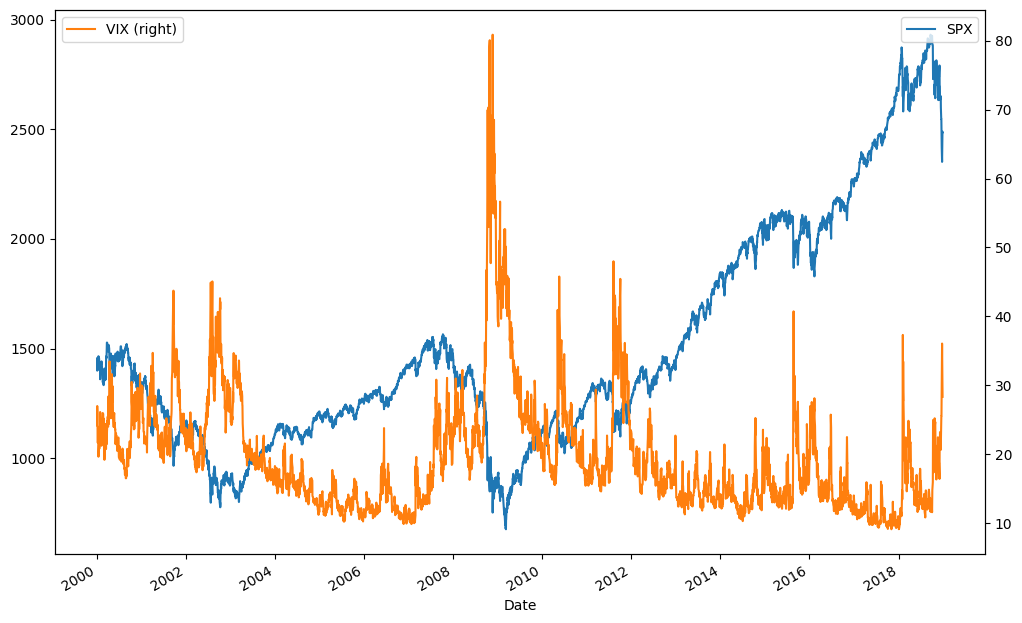

In [31]:
plt.figure(figsize=(12, 8))
ax_spx = df["SPX"].plot()
ax_vix = df["VIX"].plot(secondary_y=True)
ax_spx.legend(loc=1)
ax_vix.legend(loc=2)
plt.show()

array([[<AxesSubplot:title={'center':'SPX'}>,
        <AxesSubplot:title={'center':'VIX'}>]], dtype=object)

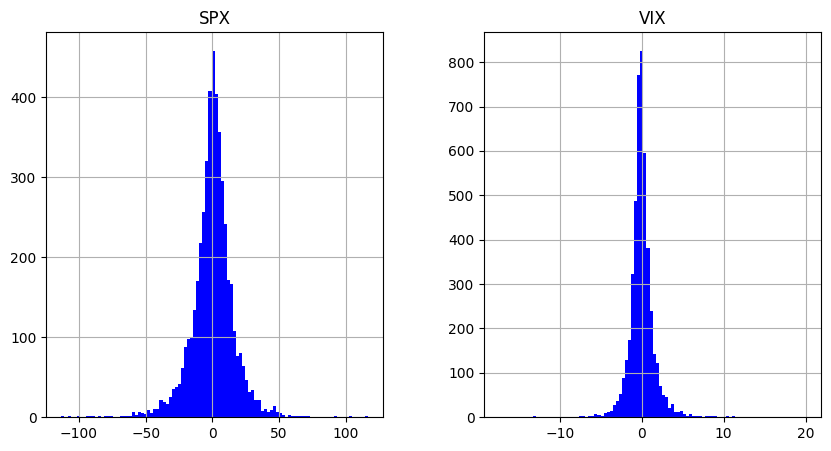

In [32]:
df.diff().hist(figsize=(10, 5), color="blue", bins=100)

array([[<AxesSubplot:title={'center':'SPX'}>,
        <AxesSubplot:title={'center':'VIX'}>]], dtype=object)

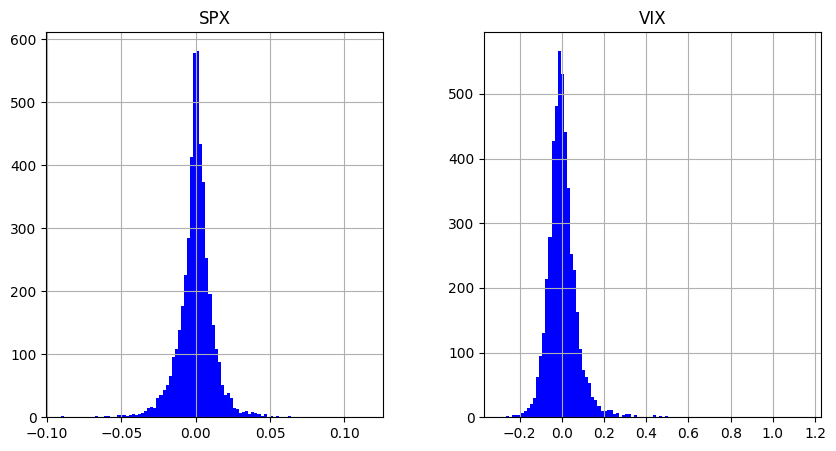

In [33]:
df.pct_change().hist(figsize=(10, 5), color="blue", bins=100)

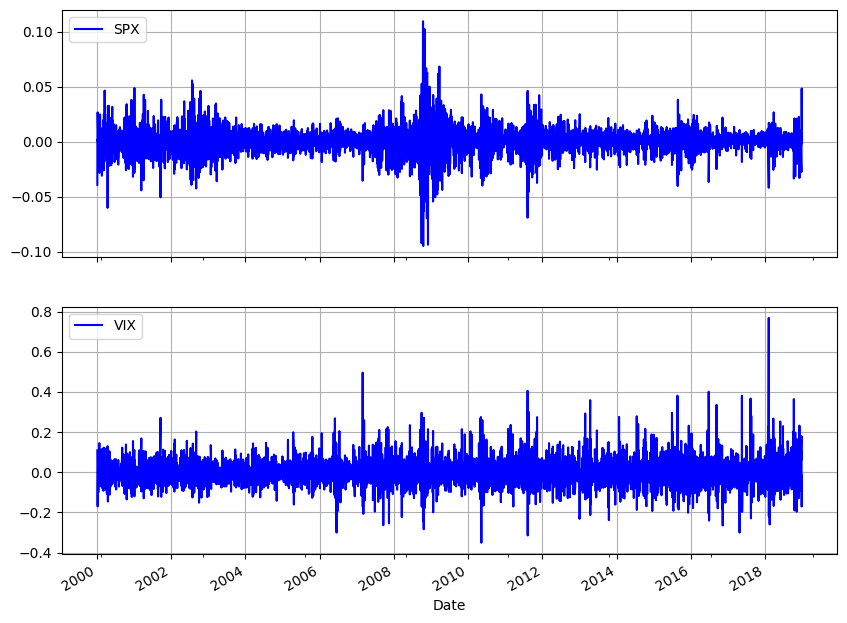

In [35]:
log_returns = df.apply(np.log).diff().dropna()
log_returns.plot(subplots=True, figsize=(10, 8), color="blue", grid=True)
for ax in plt.gcf().axes:
    ax.legend(loc="upper left")

### SPX 与 VIX 的相关性

In [36]:
log_returns.corr()

,SPX,VIX
SPX,1.000000,-0.733786
VIX,-0.733786,1.000000


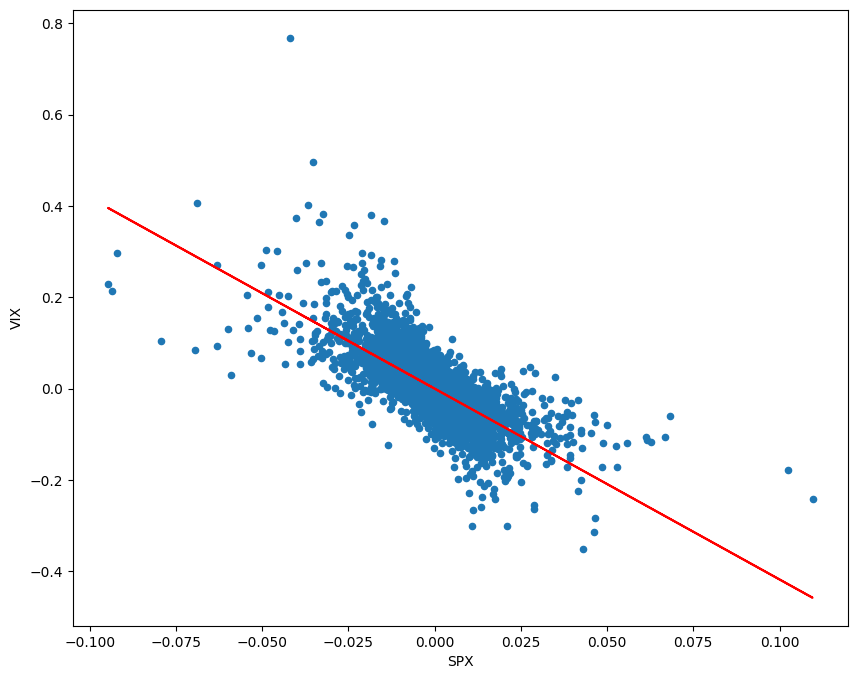

In [39]:
log_returns.plot(figsize=(10, 8), x="SPX", y="VIX", kind="scatter")
ols_fit = sm.OLS(log_returns["VIX"].values, log_returns["SPX"].values).fit()
plt.plot(log_returns["SPX"], ols_fit.fittedvalues, "r")
plt.show()

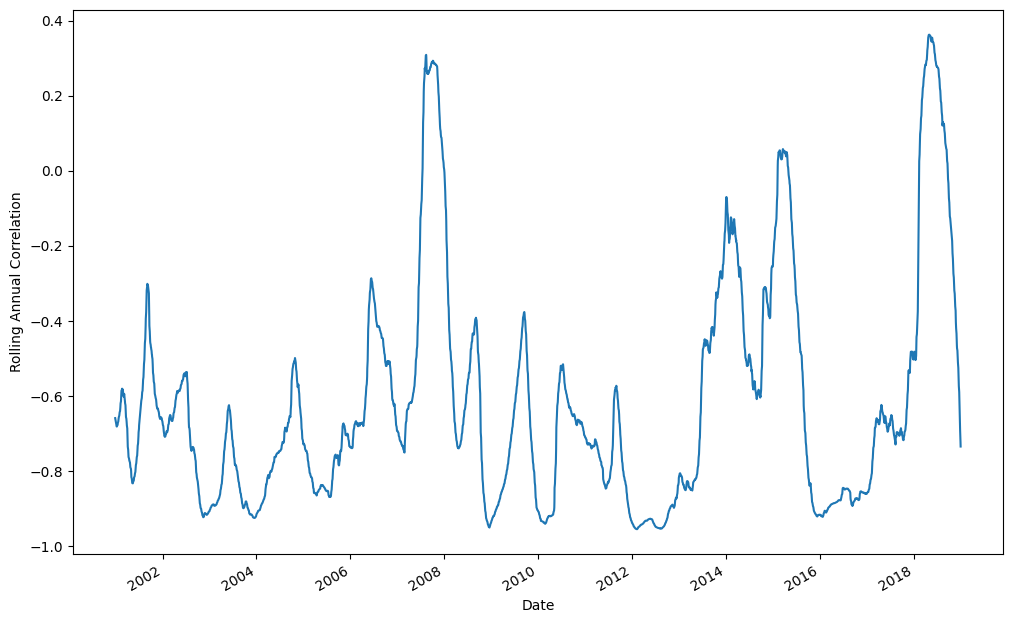

In [40]:
df_corr = df["SPX"].rolling(252).corr(other=df["VIX"])
df_corr.plot(figsize=(12, 8))
plt.ylabel("Rolling Annual Correlation")
plt.show()